In [207]:
import pandas as pd
%matplotlib nbagg
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn import utils
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,BayesianRidge,ElasticNet,Ridge,SGDRegressor 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
training_set = pd.read_csv('titanic-passengers.csv', sep = ';')
print(training_set.shape)
training_set.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [208]:
print(training_set.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [209]:
#afficher les 10 dernières lignes
training_set.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,699,No,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
882,775,Yes,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
883,809,No,2,"Meyer, Mr. August",male,39.0,0,0,248723,13.0000,NaN,S
884,278,No,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
885,150,No,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


# Explorer l'ensemble de données

<IPython.core.display.Javascript object>


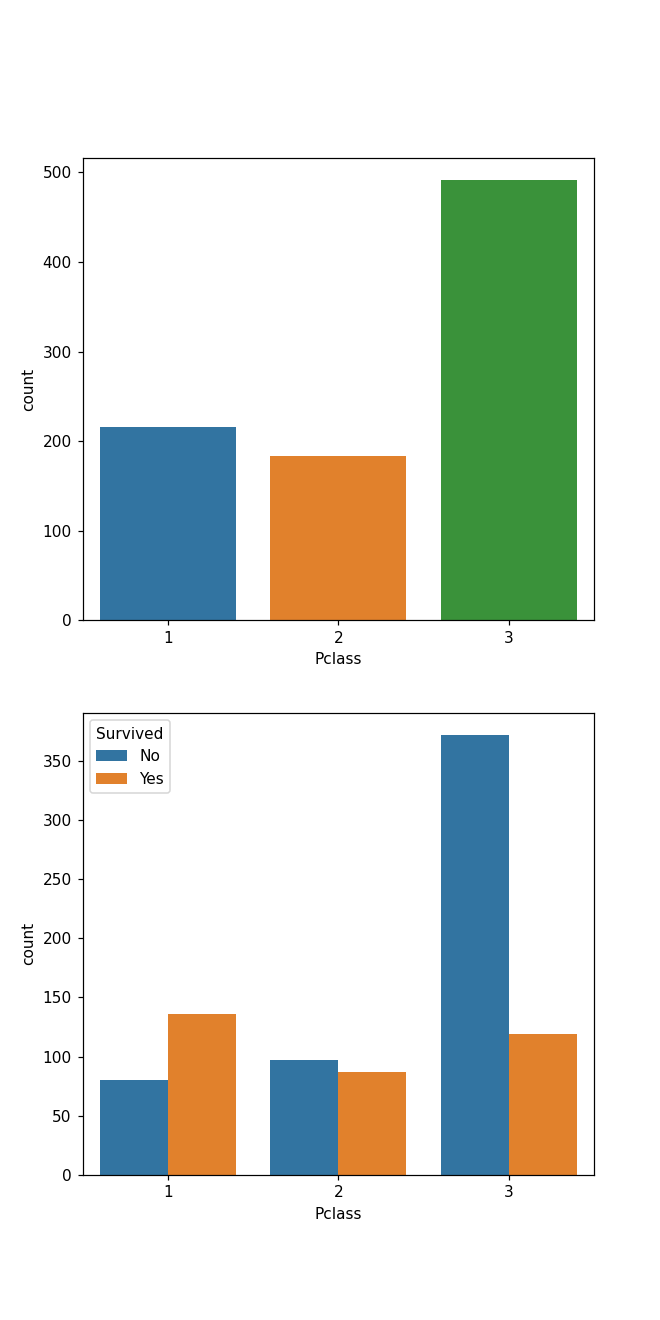

<AxesSubplot:xlabel='Pclass', ylabel='count'>

In [146]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='Pclass', data=training_set)
plt.subplot(212)
sns.countplot(x='Pclass',hue='Survived', data=training_set)

<IPython.core.display.Javascript object>


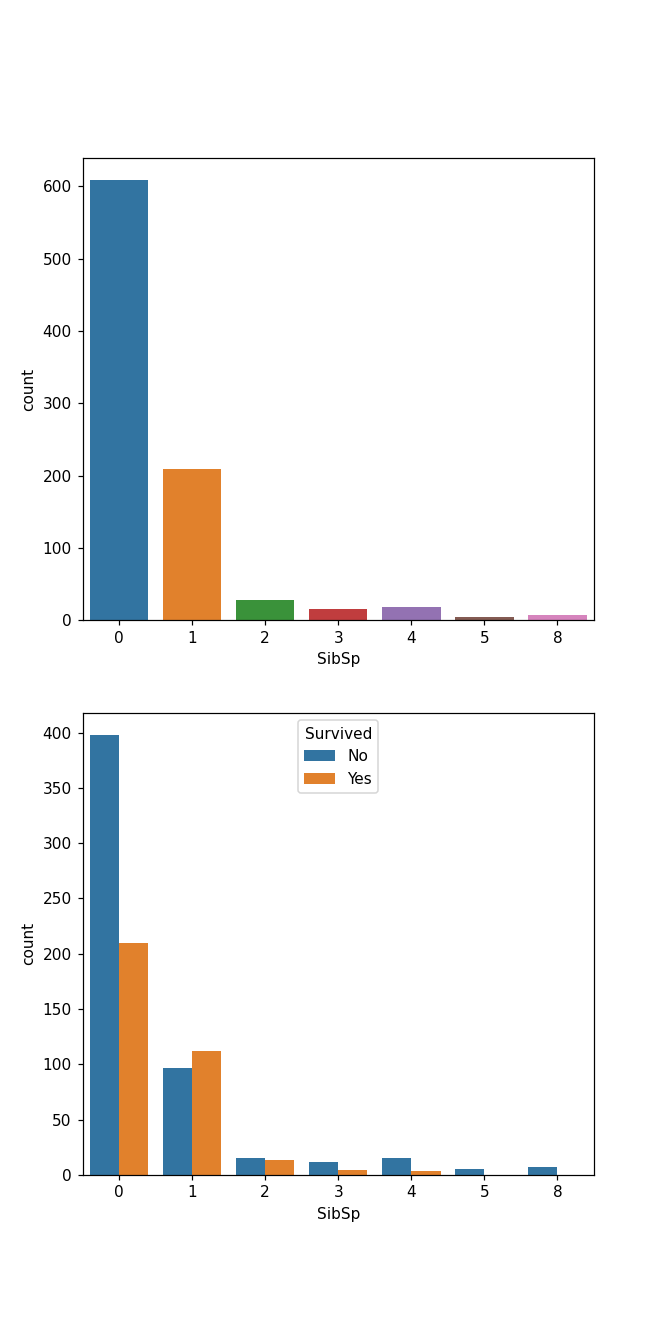

<AxesSubplot:xlabel='SibSp', ylabel='count'>

In [214]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='SibSp', data=training_set)
plt.subplot(212)
sns.countplot(x='SibSp',hue='Survived', data=training_set)

<IPython.core.display.Javascript object>


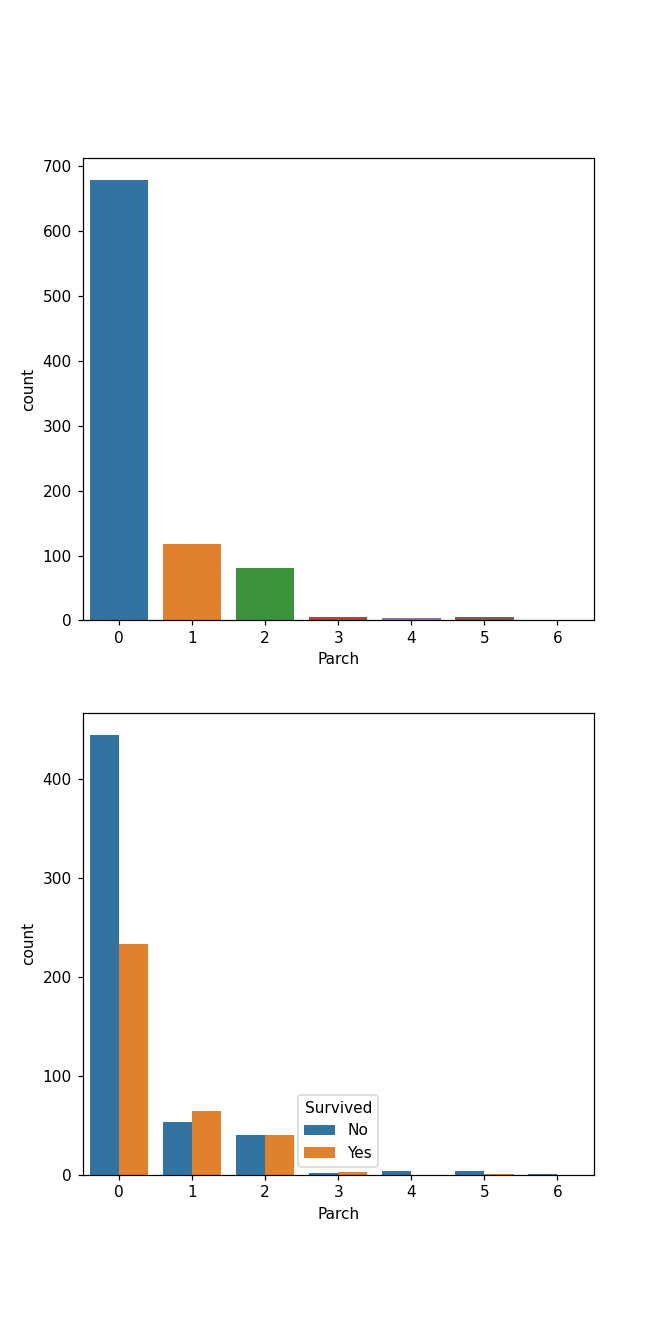

<AxesSubplot:xlabel='Parch', ylabel='count'>

In [215]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='Parch', data=training_set)
plt.subplot(212)
sns.countplot(x='Parch',hue='Survived', data=training_set)

<IPython.core.display.Javascript object>


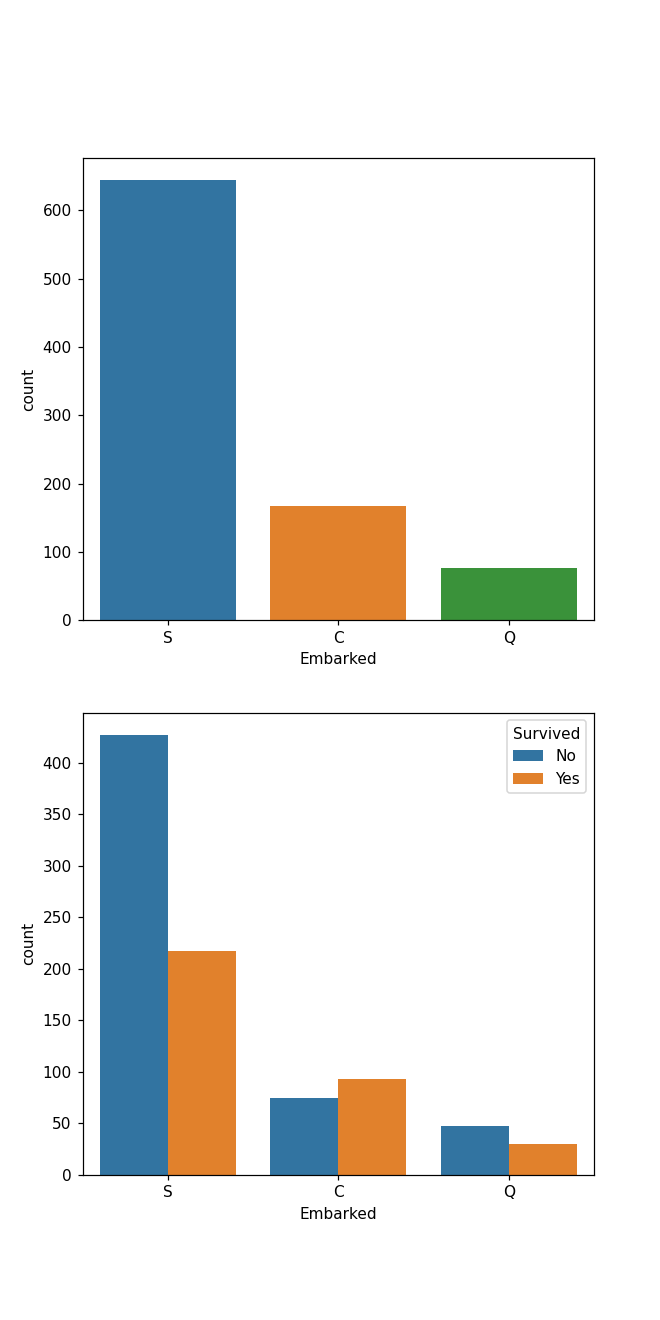

<AxesSubplot:xlabel='Embarked', ylabel='count'>

In [216]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='Embarked', data=training_set)
plt.subplot(212)
sns.countplot(x='Embarked',hue='Survived', data=training_set)

<IPython.core.display.Javascript object>


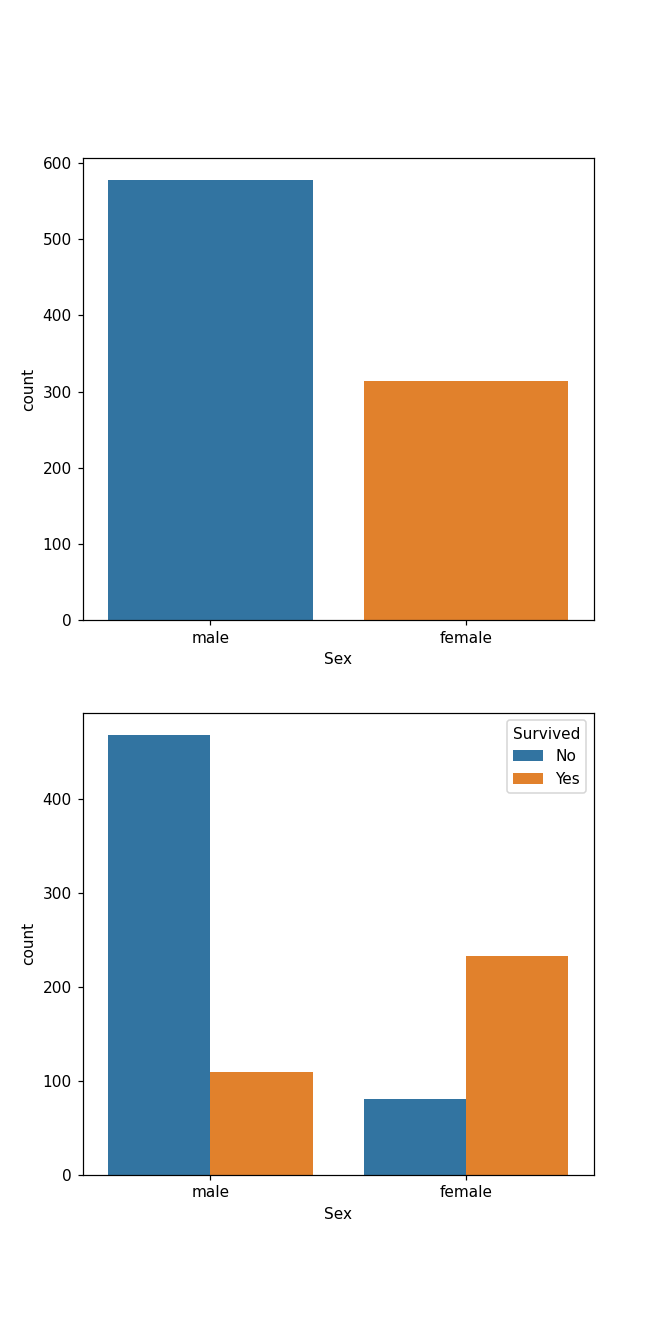

<AxesSubplot:xlabel='Sex', ylabel='count'>

In [217]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='Sex', data=training_set)
plt.subplot(212)
sns.countplot(x='Sex',hue='Survived', data=training_set)

<IPython.core.display.Javascript object>


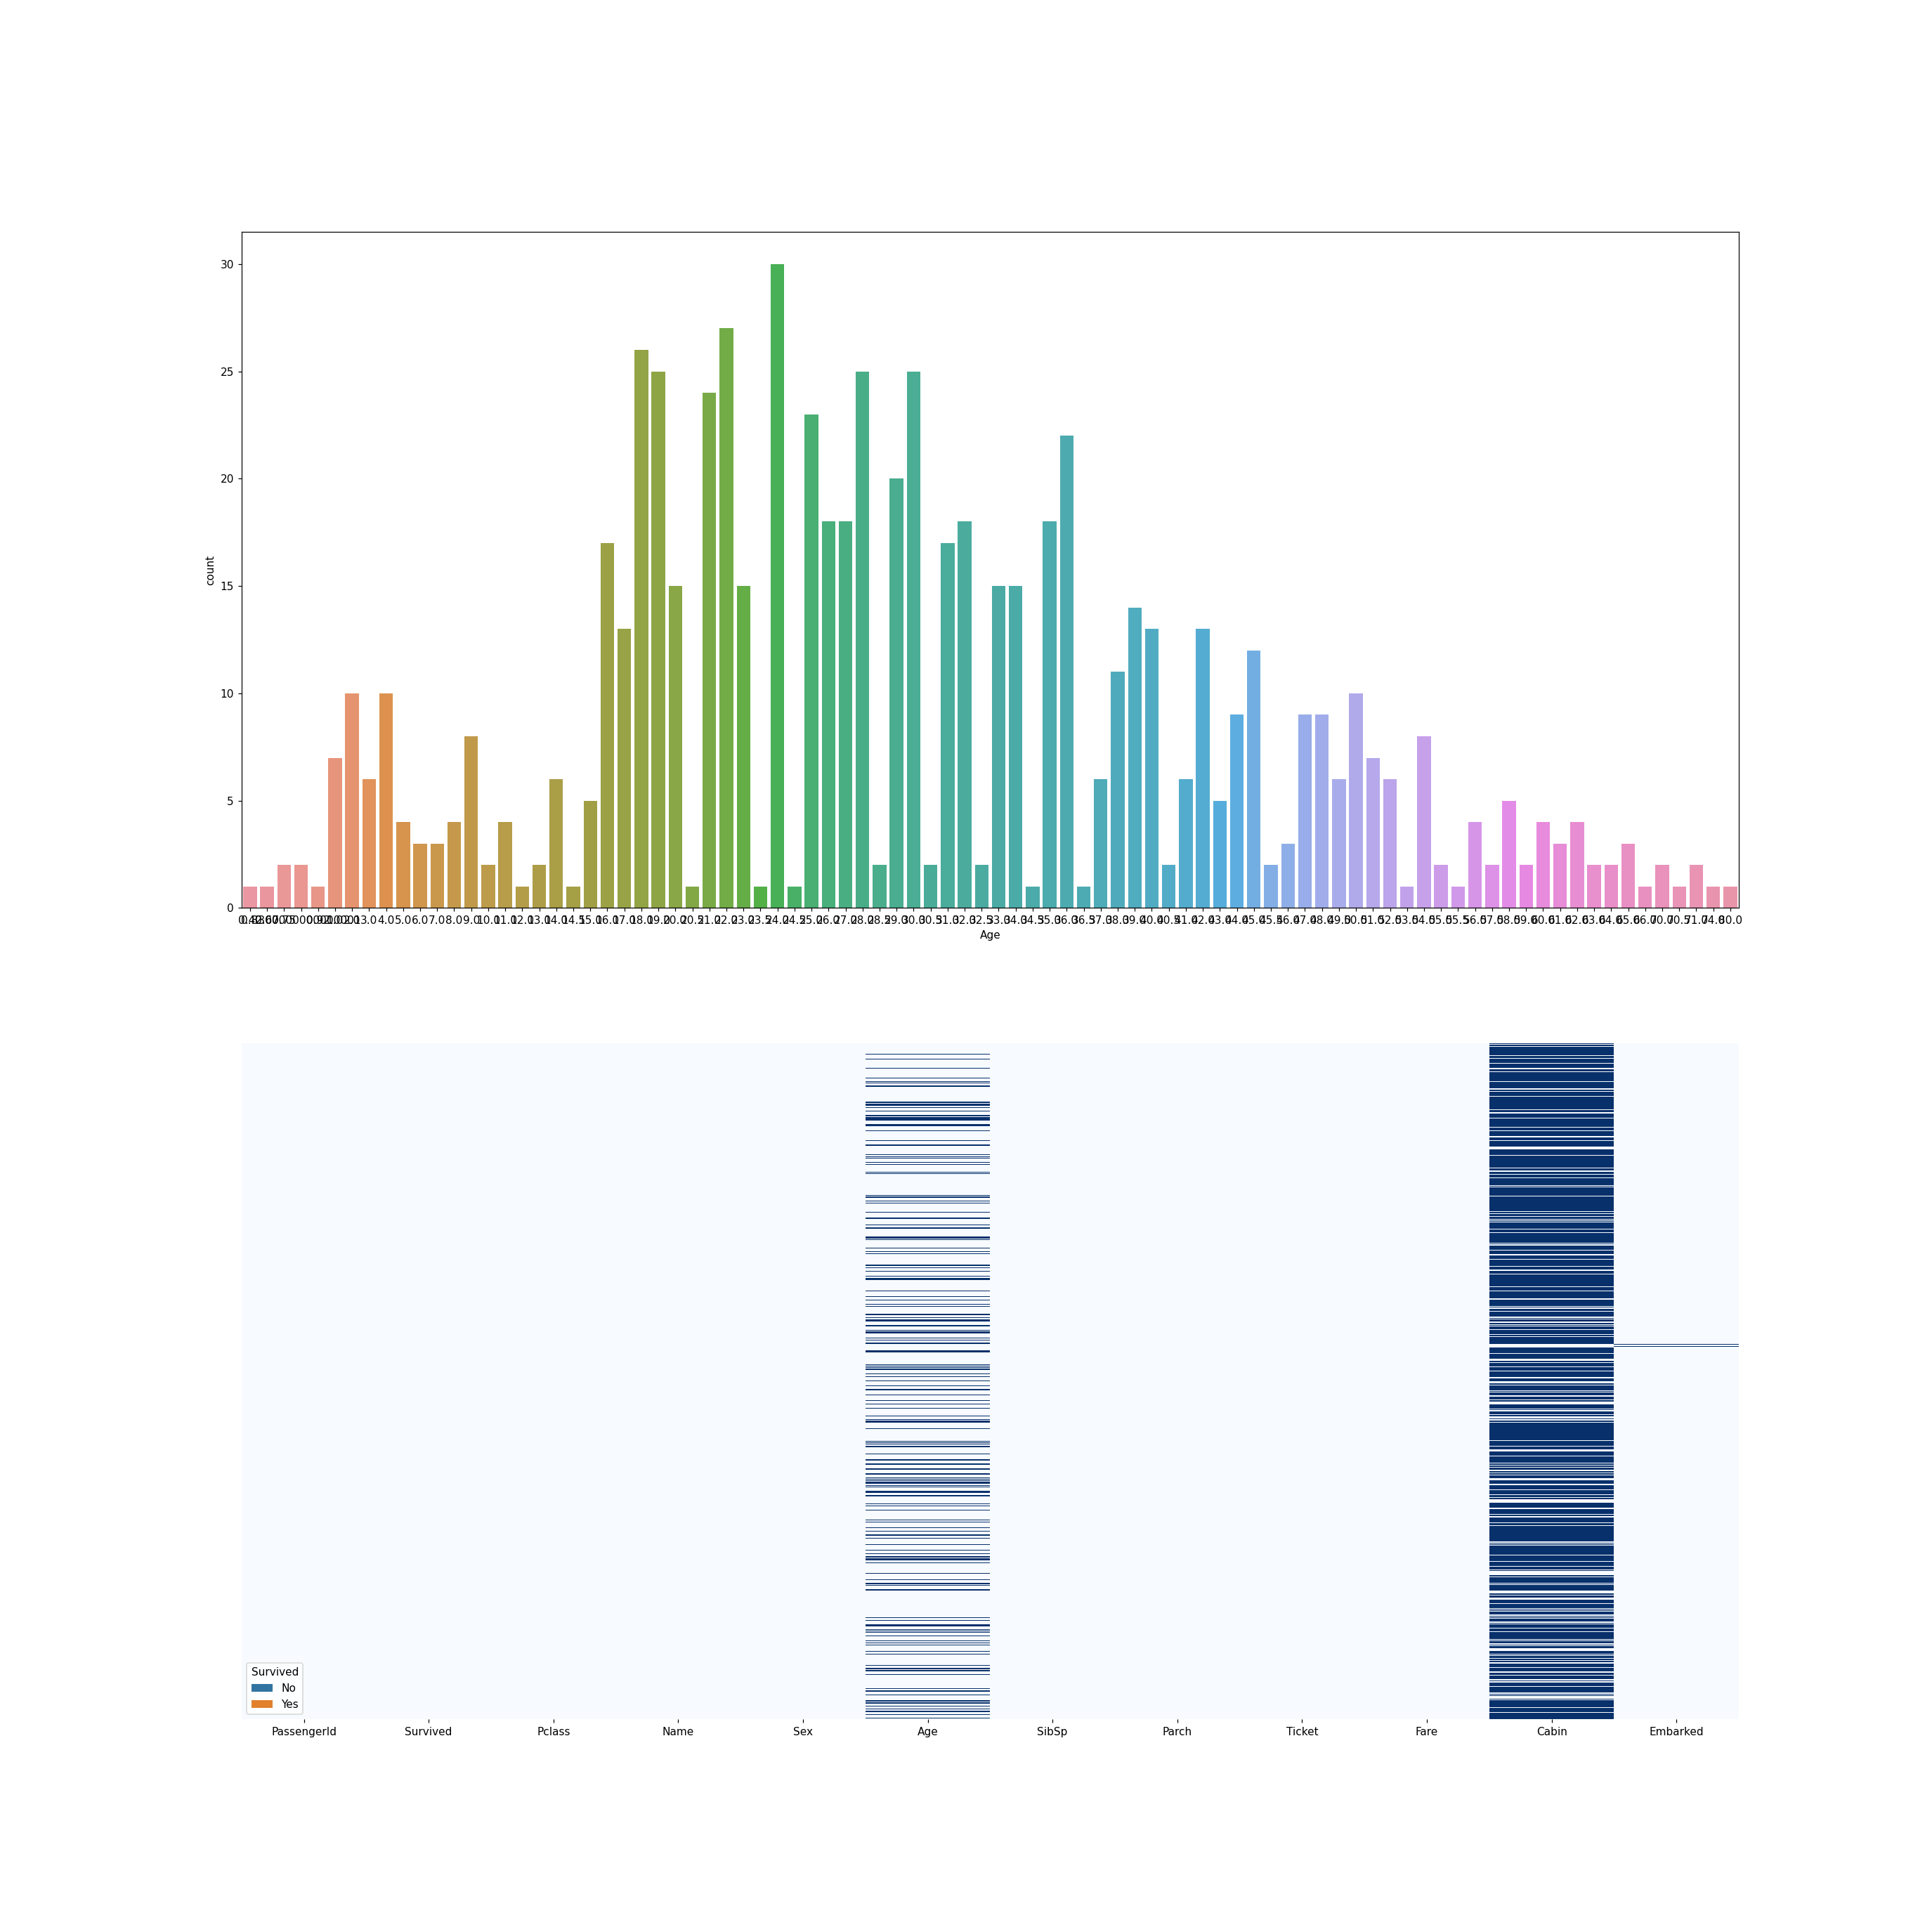

<AxesSubplot:xlabel='Age', ylabel='count'>

In [218]:
plt.figure(figsize = [25,25])
plt.subplot(211)
sns.countplot(x='Age', data=training_set)
plt.subplot(212)
sns.countplot(x='Age',hue='Survived', data=training_set)

In [219]:
training_set["Age"].hist(bins = 40)

<AxesSubplot:xlabel='Age', ylabel='count'>

In [220]:
training_set["Fare"].hist(bins = 40)

<AxesSubplot:xlabel='Age', ylabel='count'>

In [221]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar=False,cmap='Blues')

<AxesSubplot:>

In [222]:
training_set.drop('Cabin',axis=1,inplace=True)

In [223]:
training_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,S


In [ ]:
#Nous supprimons les colonnes qui ne nous aideront pas dans la prédiction, 
#telles que le nom, l'identifiant, le numéro de ticket et le port d'embarquement

In [224]:
training_set.drop(['PassengerId','Name','Ticket','Embarked'],axis=1,inplace=True)

In [225]:
training_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,No,2,male,28.0,0,0,13.0000
1,No,3,male,25.0,0,0,7.6500
2,No,3,male,20.0,0,0,7.8542
3,No,3,female,29.0,0,4,21.0750
4,No,1,male,31.0,1,0,52.0000
5,No,3,male,37.0,2,0,7.9250
6,No,3,male,19.0,0,0,14.5000
7,Yes,3,female,1.0,0,2,15.7417
8,No,3,male,20.5,0,0,7.2500
9,Yes,2,female,42.0,1,0,26.0000


In [161]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar=False,cmap='Blues')

<AxesSubplot:>

In [ ]:
#Nous devons faire face à l'âge et remplacer les valeurs manquantes

<IPython.core.display.Javascript object>


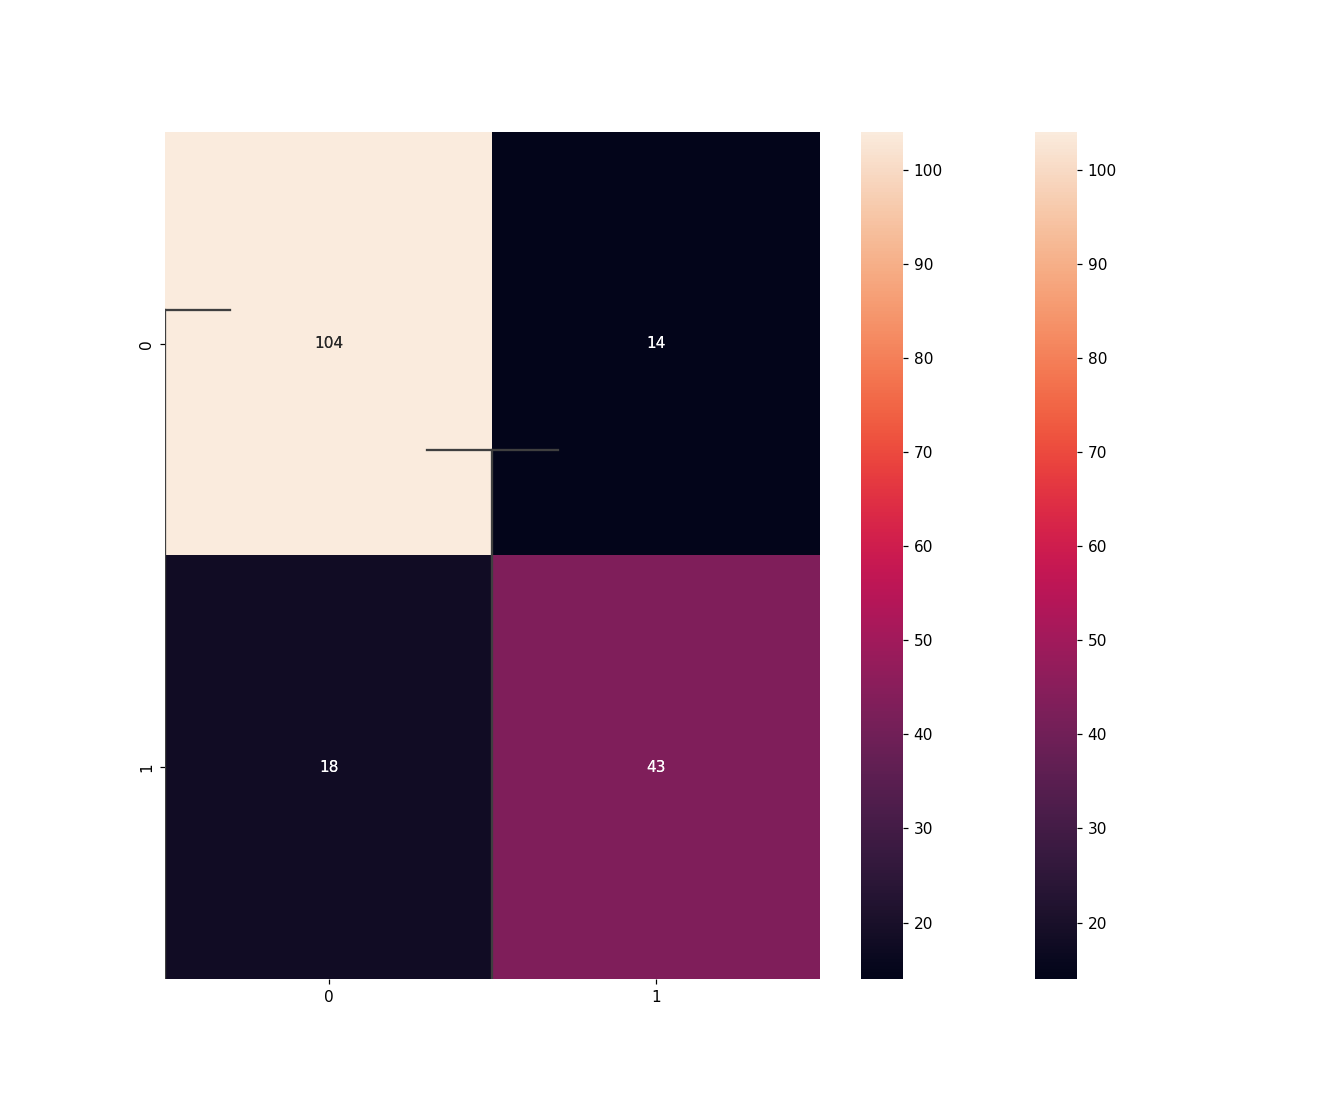

<AxesSubplot:xlabel='Sex', ylabel='Age'>

In [226]:
plt.figure(figsize= (12,10))
sns.boxplot(x='Sex',y='Age',data=training_set)

In [227]:
def Fill_Age(data):
    age=data[0]
    sex=data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 25
    else:
        return age

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\hp\AppData\Local\Temp/ipykernel_8836/3059361905.py:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if sex is 'male':


In [230]:
training_set['Age']=training_set[['Age','Sex']].apply(Fill_Age,axis=1)

In [231]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar=False,cmap='Blues')

<AxesSubplot:>

In [232]:
training_set['Age'].hist(bins=20)

<AxesSubplot:>

In [233]:
training_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,No,2,male,28.0,0,0,13.0000
1,No,3,male,25.0,0,0,7.6500
2,No,3,male,20.0,0,0,7.8542
3,No,3,female,29.0,0,4,21.0750
4,No,1,male,31.0,1,0,52.0000
5,No,3,male,37.0,2,0,7.9250
6,No,3,male,19.0,0,0,14.5000
7,Yes,3,female,1.0,0,2,15.7417
8,No,3,male,20.5,0,0,7.2500
9,Yes,2,female,42.0,1,0,26.0000


In [234]:
male=pd.get_dummies(training_set["Sex"],drop_first=True)
male

,male
0,1
1,1
2,1
3,0
4,1
...,...
886,0
887,1
888,0
889,1


In [235]:
training_set.drop(["Sex"],axis=1,inplace=True)

In [236]:
training_set.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,No,2,28.0,0,0,13.0000
1,No,3,25.0,0,0,7.6500
2,No,3,20.0,0,0,7.8542
3,No,3,29.0,0,4,21.0750
4,No,1,31.0,1,0,52.0000


In [237]:
training_set = pd.concat([training_set,male], axis = 1)

In [238]:
training_set.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,No,2,28.0,0,0,13.0000,1
1,No,3,25.0,0,0,7.6500,1
2,No,3,20.0,0,0,7.8542,1
3,No,3,29.0,0,4,21.0750,0
4,No,1,31.0,1,0,52.0000,1


In [239]:
X=training_set.drop('Survived',axis=1).values
y=training_set['Survived'].values

In [246]:
lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

In [247]:
print(X.shape)
print(y.shape)

(891, 6)
(891,)


# Former le modèle

In [248]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [257]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred  = classifier.predict(X_test)    
print("Accuracy={:.2f}".format(classifier.score(X_test, y_test)))

Accuracy=0.82


# Évaluer le modèle

In [258]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d')

<AxesSubplot:>

In [259]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       118
           1       0.75      0.70      0.73        61

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [261]:
from sklearn.metrics import roc_auc_score

In [262]:
auc_lr = roc_auc_score(y_test,y_predict)